In [1]:
import pandas as pd

# Load data
df = pd.read_csv('C:/Users/IDEH/Downloads/Telegram Desktop/dataset/h.pylori.csv')

# Clean up data
df['test result '] = df['test result '].replace({2.0: 1.0})
df = df.drop(columns=['treatment', 'treatment result'])
df = df.iloc[1:, :]
df = df.dropna()

# Encode job categories
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['job_encoded'] = label_encoder.fit_transform(df['job'])
df = df.drop(columns=['job'])
df.columns


Index(['case no', 'age', 'sex', 'education', 'epigastric pain ', 'fullness',
       ' bloating', 'reflux', 'halitosis', ' nausea', 'vomit', ' diarrhea',
       ' constipation', 'months', 'Hematochezia', 'loss of appetite',
       'weight loss', 'night sweating',
       'Treatment of previous infection and use of antibiotics', ' ppi taking',
       ' nsaid taking', 'alchohlic', 'smoker', 'Gastrointestinal bleeding',
       'malignant stomach', 'peptic ulcer',
       'Gastrointestinal bleeding fam hist', 'gastic camcer fam hist',
       'stomach ulcer', 'Revisit', 'test result ', 'job_encoded'],
      dtype='object')

<Figure size 1400x1000 with 0 Axes>

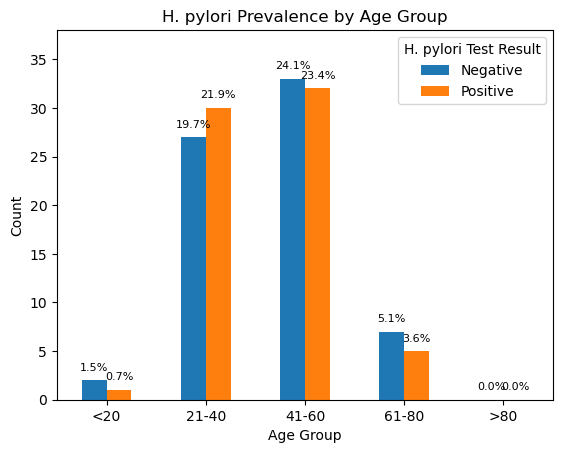

,age_group,Positive Count,Negative Count,Positive Percentage,Negative Percentage
0,<20,1,2,33.333333,66.666667
1,21-40,30,27,52.631579,47.368421
2,41-60,32,33,49.230769,50.769231
3,61-80,5,7,41.666667,58.333333
4,>80,0,0,NaN,NaN


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


df = pd.read_csv('C:/Users/IDEH/Downloads/Telegram Desktop/dataset/h.pylori.csv')

# Clean up data
df['test result '] = df['test result '].replace({2.0: 1.0})
df = df.drop(columns=['treatment', 'treatment result'])
df = df.iloc[1:, :]
df = df.dropna()

# Encode job categories
label_encoder = LabelEncoder()
df['job_encoded'] = label_encoder.fit_transform(df['job'])
df = df.drop(columns=['job'])

# Convert 'test result' to binary for positive/negative test outcome
df['h_pylori_positive'] = df['test result '].apply(lambda x: 'Positive' if x == 1 else 'Negative')

# Create age bins for better visualization
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 40, 60, 80, 100], labels=['<20', '21-40', '41-60', '61-80', '>80'])

# Calculate counts and percentages for each age group and test result
age_result_counts = df.groupby(['age_group', 'h_pylori_positive']).size().unstack(fill_value=0)
age_result_percentages = age_result_counts.div(age_result_counts.sum(axis=1), axis=0) * 100

# Combine counts and percentages into a single DataFrame
summary_df = pd.DataFrame({
    'Positive Count': age_result_counts['Positive'],
    'Negative Count': age_result_counts['Negative'],
    'Positive Percentage': age_result_percentages['Positive'],
    'Negative Percentage': age_result_percentages['Negative'],
})

# Reset index for better visualization
summary_df.reset_index(inplace=True)



# Plot H. pylori prevalence by age group with percentages above the bars
plt.figure(figsize=(14, 10))
ax = age_result_counts.plot(kind='bar', rot=0)
plt.title('H. pylori Prevalence by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='H. pylori Test Result')
plt.ylim(0, age_result_counts.max().max() + 5)  # Adjust y-axis limit for aesthetics

# Add percentage labels above each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height + 1, s='{:.1f}%'.format(height / len(df) * 100), ha='center', fontsize=8)

plt.show()
# Display the summary DataFrame
summary_df

In [1]:
# job

<Figure size 1400x1000 with 0 Axes>

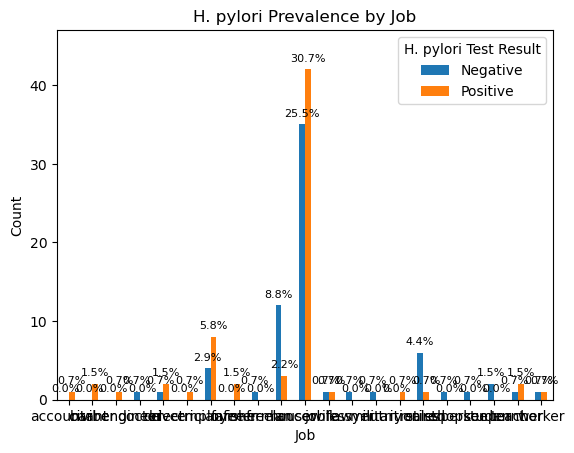

,job,Positive Count,Negative Count,Positive Percentage,Negative Percentage
0,accountant,1,0,100.000000,0.000000
1,barber,2,0,100.000000,0.000000
2,civil engineer,1,0,100.000000,0.000000
3,doctor,0,1,0.000000,100.000000
4,driver,2,1,66.666667,33.333333
5,electrician,1,0,100.000000,0.000000
6,employee,8,4,66.666667,33.333333
7,farmer,2,0,100.000000,0.000000
8,fisherman,0,1,0.000000,100.000000
9,freelancer,3,12,20.000000,80.000000


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('C:/Users/IDEH/Downloads/Telegram Desktop/dataset/h.pylori.csv')

# Assuming you've already loaded and cleaned the data in `df`
# Clean up data (if not done already)
df['test result '] = df['test result '].replace({2.0: 1.0})
df = df.drop(columns=['treatment', 'treatment result'])
df = df.iloc[1:, :]
df = df.dropna()

# Convert 'test result' to binary for positive/negative test outcome
df['h_pylori_positive'] = df['test result '].apply(lambda x: 'Positive' if x == 1 else 'Negative')

# Calculate counts and percentages for each job and test result
job_result_counts = df.groupby(['job', 'h_pylori_positive']).size().unstack(fill_value=0)
job_result_percentages = job_result_counts.div(job_result_counts.sum(axis=1), axis=0) * 100

# Combine counts and percentages into a single DataFrame
summary_job_df = pd.DataFrame({
    'Positive Count': job_result_counts['Positive'],
    'Negative Count': job_result_counts['Negative'],
    'Positive Percentage': job_result_percentages['Positive'],
    'Negative Percentage': job_result_percentages['Negative'],
})

# Reset index for better visualization
summary_job_df.reset_index(inplace=True)

# Plot H. pylori prevalence by job with percentages above the bars
plt.figure(figsize=(14, 10))
ax = job_result_counts.plot(kind='bar', rot=0)
plt.title('H. pylori Prevalence by Job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.legend(title='H. pylori Test Result')
plt.ylim(0, job_result_counts.max().max() + 5)  # Adjust y-axis limit for aesthetics

# Add percentage labels above each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height + 1, 
            s='{:.1f}%'.format(height / len(df) * 100), ha='center', fontsize=8)

plt.show()

# Display the summary DataFrame
summary_job_df


In [6]:
# Job

<Figure size 1400x1000 with 0 Axes>

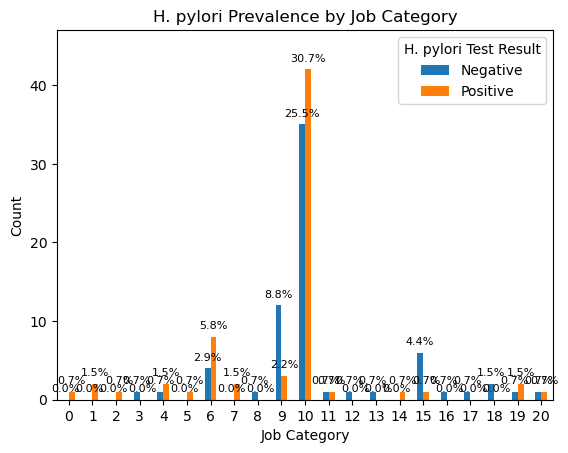

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


df = pd.read_csv('C:/Users/IDEH/Downloads/Telegram Desktop/dataset/h.pylori.csv')

# Clean up data
df['test result '] = df['test result '].replace({2.0: 1.0})
df = df.drop(columns=['treatment', 'treatment result'])
df = df.iloc[1:, :]
df = df.dropna()

# Encode job categories
label_encoder = LabelEncoder()
df['job_encoded'] = label_encoder.fit_transform(df['job'])

# Convert 'test result' to binary for positive/negative test outcome
df['h_pylori_positive'] = df['test result '].apply(lambda x: 'Positive' if x == 1 else 'Negative')

# Calculate counts and percentages for each job category and test result
job_result_counts = df.groupby(['job_encoded', 'h_pylori_positive']).size().unstack(fill_value=0)
job_result_percentages = job_result_counts.div(job_result_counts.sum(axis=1), axis=0) * 100

# Combine counts and percentages into a single DataFrame
summary_df = pd.DataFrame({
    'Positive Count': job_result_counts['Positive'],
    'Negative Count': job_result_counts['Negative'],
    'Positive Percentage': job_result_percentages['Positive'],
    'Negative Percentage': job_result_percentages['Negative'],
})

# Reset index for better visualization (optional for this analysis)
# summary_df.reset_index(inplace=True)


# Plot H. pylori prevalence by job category with percentages above the bars
plt.figure(figsize=(14, 10))
ax = job_result_counts.plot(kind='bar', rot=0)
plt.title('H. pylori Prevalence by Job Category')
plt.xlabel('Job Category')  # Since job categories are encoded, consider using label_encoder.inverse_transform(df['job_encoded'].unique()) for more descriptive labels on the x-axis
plt.ylabel('Count')
plt.legend(title='H. pylori Test Result')
plt.ylim(0, job_result_counts.max().max() + 5)  # Adjust y-axis limit for aesthetics

# Add percentage labels above each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height + 1, s='{:.1f}%'.format(height / len(df) * 100), ha='center', fontsize=8)

plt.show()

# Display the summary DataFrame (optional for this analysis)
# summary_df

In [5]:
# Sex

    index  Female Positive Count  Female Negative Count  Male Positive Count  \
0  Female                     53                     50                   15   
1    Male                     53                     50                   15   

   Male Negative Count  Female Positive Percentage  \
0                   19                   51.456311   
1                   19                   51.456311   

   Female Negative Percentage  Male Positive Percentage  \
0                   48.543689                 44.117647   
1                   48.543689                 44.117647   

   Male Negative Percentage  
0                 55.882353  
1                 55.882353  


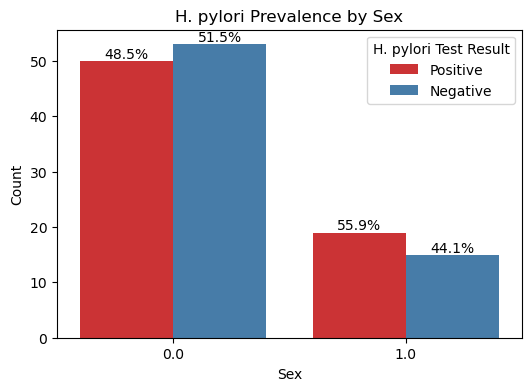

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('C:/Users/IDEH/Downloads/Telegram Desktop/dataset/h.pylori.csv')


# Clean up data
df['test result '] = df['test result '].replace({2.0: 1.0})
df = df.drop(columns=['treatment', 'treatment result'])
df = df.iloc[1:, :]
df = df.dropna()

# Encode job categories
label_encoder = LabelEncoder()
df['job_encoded'] = label_encoder.fit_transform(df['job'])
df = df.drop(columns=(['job']))

# Convert 'test result' to binary for positive/negative test outcome
df['h_pylori_positive'] = df['test result '].apply(lambda x: 'Positive' if x == 1 else 'Negative')

# Calculate counts and percentages for each sex and test result
sex_result_counts = df.groupby(['sex', 'h_pylori_positive']).size().unstack(fill_value=0)
sex_result_percentages = sex_result_counts.div(sex_result_counts.sum(axis=1), axis=0) * 100

# Combine counts and percentages into a single DataFrame
sex_summary_df = pd.DataFrame({
    'Female Positive Count': sex_result_counts.loc[0, 'Positive'],
    'Female Negative Count': sex_result_counts.loc[0, 'Negative'],
    'Male Positive Count': sex_result_counts.loc[1, 'Positive'],
    'Male Negative Count': sex_result_counts.loc[1, 'Negative'],
    'Female Positive Percentage': sex_result_percentages.loc[0, 'Positive'],
    'Female Negative Percentage': sex_result_percentages.loc[0, 'Negative'],
    'Male Positive Percentage': sex_result_percentages.loc[1, 'Positive'],
    'Male Negative Percentage': sex_result_percentages.loc[1, 'Negative'],
}, index=['Female', 'Male'])

# Reset index for better visualization
sex_summary_df.reset_index(inplace=True)

# Display the summary DataFrame
print(sex_summary_df)

# Plot H. pylori prevalence by sex with percentage labels
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='sex', hue='h_pylori_positive', palette='Set1')
plt.title('H. pylori Prevalence by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='H. pylori Test Result', labels=['Positive', 'Negative'])

# Calculate total counts by sex
total_by_sex = df['sex'].value_counts()

# Add percentage labels above each bar
for p in ax.patches:
    height = p.get_height()
    sex = 0 if p.get_x() < 0.5 else 1  # Adjust based on bar position
    total_count = total_by_sex[sex]
    percentage = 100 * height / total_count
    ax.text(p.get_x() + p.get_width() / 2, height + 0.5, '{:.1f}%'.format(percentage), ha='center')

plt.show()


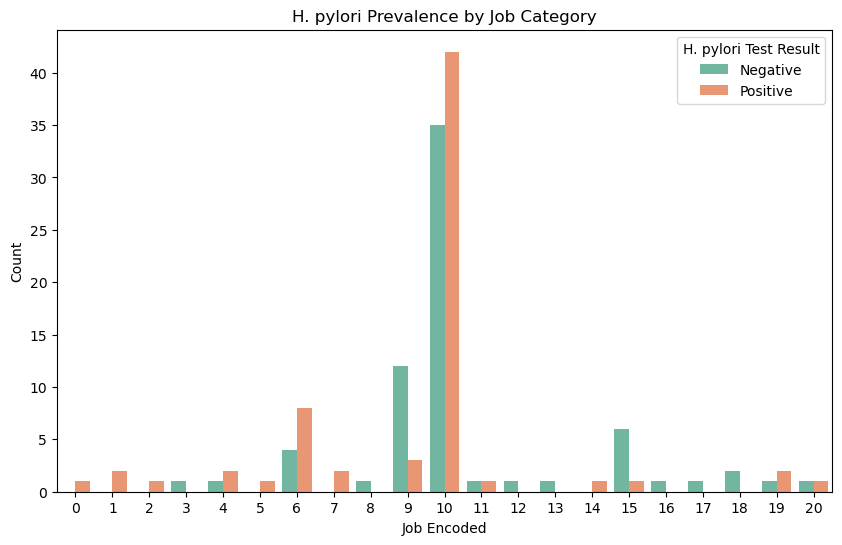

In [4]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='job_encoded', hue='h_pylori_positive', palette='Set2')
plt.title('H. pylori Prevalence by Job Category')
plt.xlabel('Job Encoded')
plt.ylabel('Count')
plt.legend(title='H. pylori Test Result')
plt.show()


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('C:/Users/IDEH/Downloads/Telegram Desktop/dataset/h.pylori.csv')


# Clean up data
df['test result '] = df['test result '].replace({2.0: 1.0})
df = df.drop(columns=['treatment', 'treatment result'])
df = df.iloc[1:, :]
df = df.dropna()

# Encode job categories
label_encoder = LabelEncoder()
df['job_encoded'] = label_encoder.fit_transform(df['job'])
df = df.drop(columns=(['job']))

# Convert 'test result' to binary for positive/negative test outcome
df['h_pylori_positive'] = df['test result '].apply(lambda x: 'Positive' if x == 1 else 'Negative')

# Calculate counts and percentages for each job category and test result
job_result_counts = df.groupby(['job_encoded', 'h_pylori_positive']).size().unstack(fill_value=0)
job_result_percentages = job_result_counts.div(job_result_counts.sum(axis=1), axis=0) * 100

# Combine counts and percentages into a single DataFrame
job_summary_df = pd.DataFrame({
    'Positive Count': job_result_counts['Positive'],
    'Negative Count': job_result_counts['Negative'],
    'Positive Percentage': job_result_percentages['Positive'],
    'Negative Percentage': job_result_percentages['Negative']
})

# Reset index for better visualization
job_summary_df.reset_index(inplace=True)

# Display the summary DataFrame
job_summary_df




,job_encoded,Positive Count,Negative Count,Positive Percentage,Negative Percentage
0,0,1,0,100.000000,0.000000
1,1,2,0,100.000000,0.000000
2,2,1,0,100.000000,0.000000
3,3,0,1,0.000000,100.000000
4,4,2,1,66.666667,33.333333
5,5,1,0,100.000000,0.000000
6,6,8,4,66.666667,33.333333
7,7,2,0,100.000000,0.000000
8,8,0,1,0.000000,100.000000
9,9,3,12,20.000000,80.000000


In [7]:
# 2

<Figure size 1000x600 with 0 Axes>

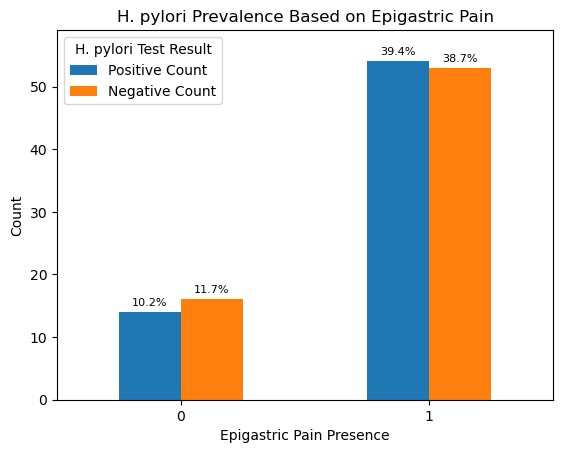

<Figure size 1000x600 with 0 Axes>

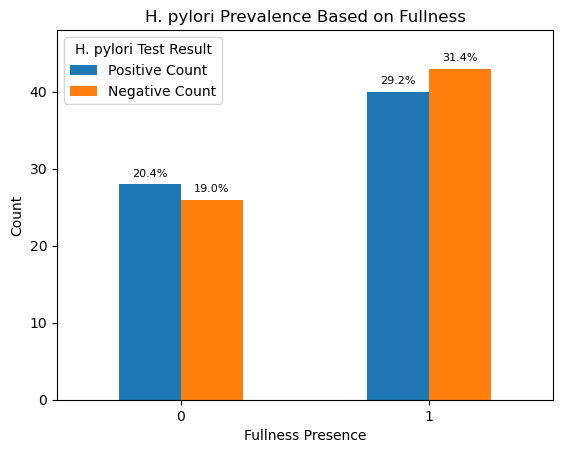

<Figure size 1000x600 with 0 Axes>

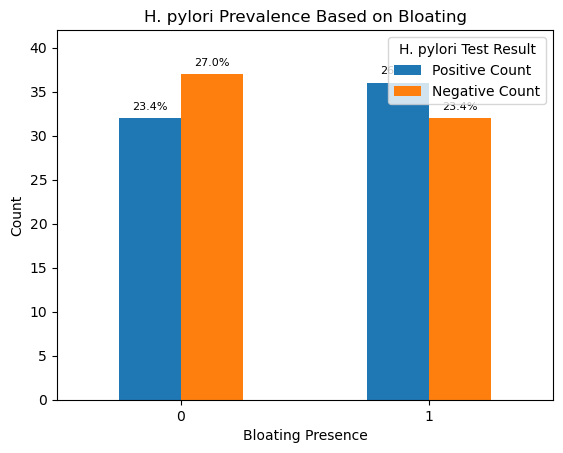

<Figure size 1000x600 with 0 Axes>

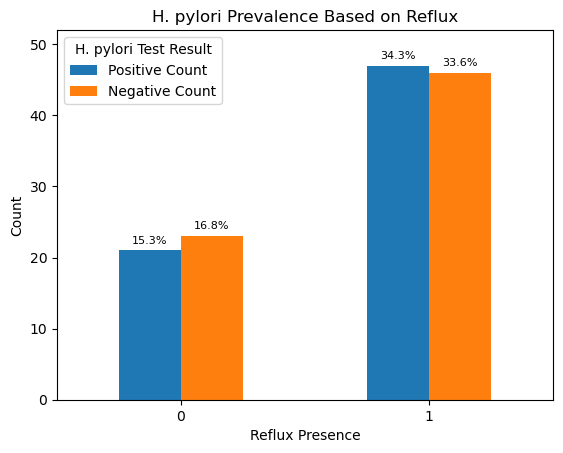

<Figure size 1000x600 with 0 Axes>

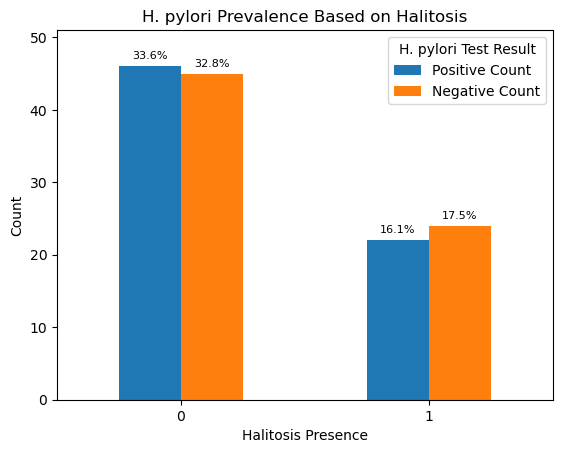

<Figure size 1000x600 with 0 Axes>

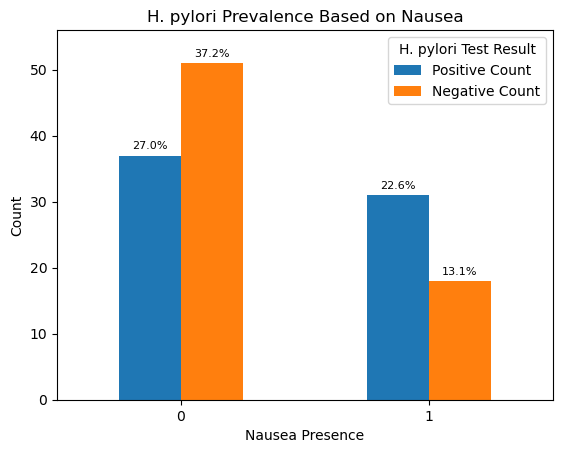

<Figure size 1000x600 with 0 Axes>

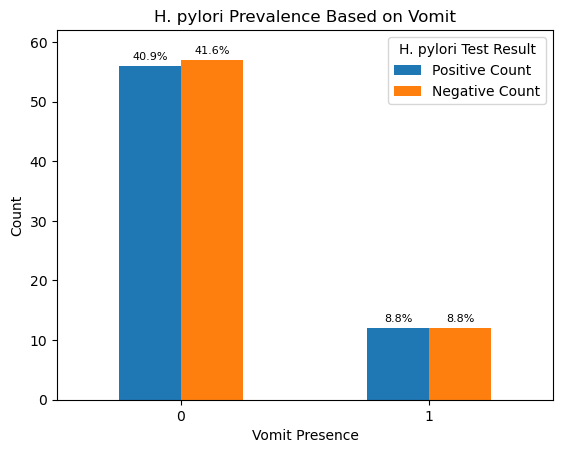

<Figure size 1000x600 with 0 Axes>

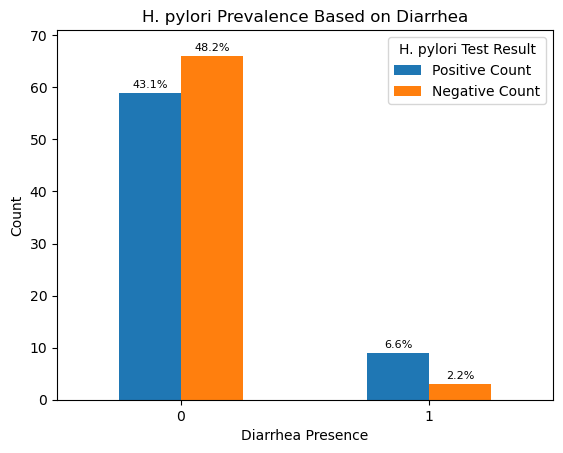

<Figure size 1000x600 with 0 Axes>

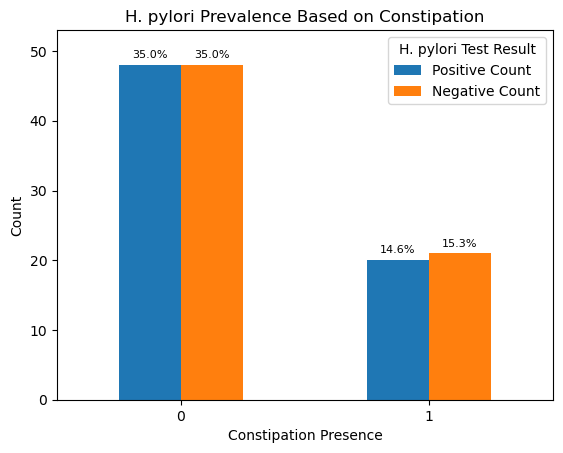

<Figure size 1000x600 with 0 Axes>

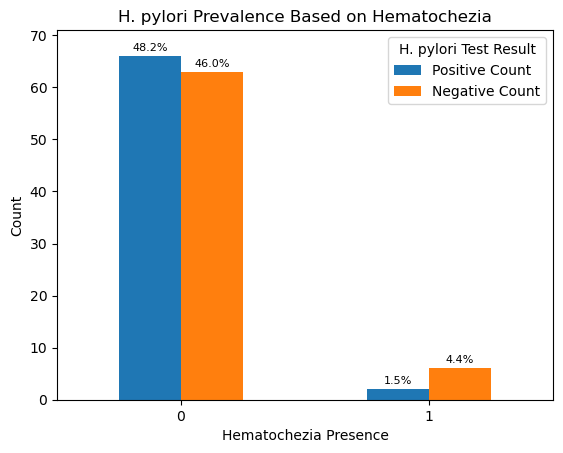

<Figure size 1000x600 with 0 Axes>

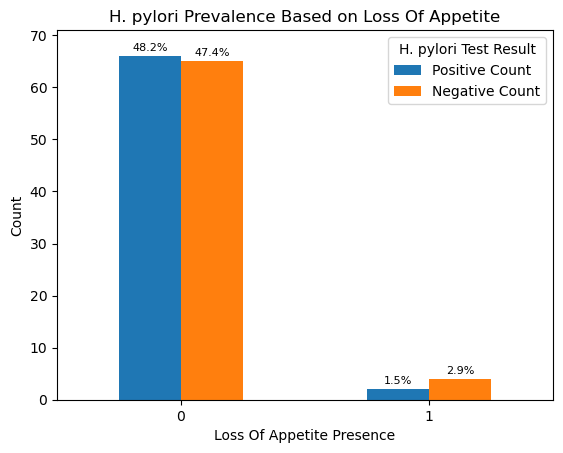

<Figure size 1000x600 with 0 Axes>

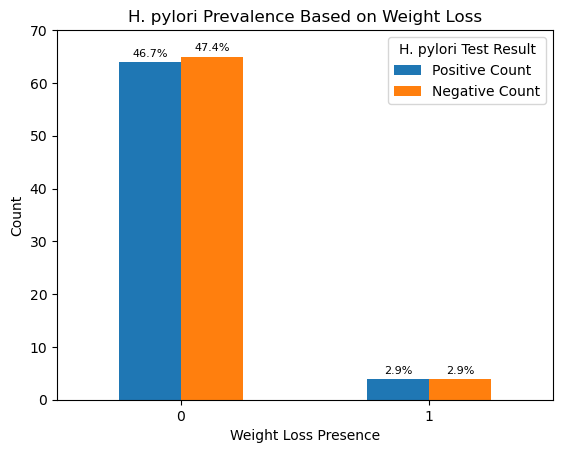

<Figure size 1000x600 with 0 Axes>

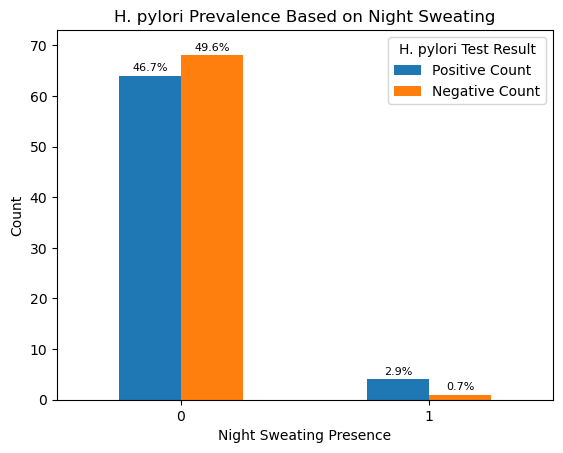

,weight loss,Positive Count,Negative Count,Positive Percentage,Negative Percentage
0,0.0,64,65,49.612403,50.387597
1,1.0,4,4,50.000000,50.000000


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:/Users/IDEH/Downloads/Telegram Desktop/dataset/h.pylori.csv')

# Clean up the data (if not done already)
df['test result '] = df['test result '].replace({2.0: 1.0})
df = df.drop(columns=['treatment', 'treatment result'])
df = df.iloc[1:, :]
df = df.dropna()

# Convert 'test result' to binary for positive/negative test outcome
df['h_pylori_positive'] = df['test result '].apply(lambda x: 'Positive' if x == 1 else 'Negative')

# List of clinical symptoms
symptoms = ['epigastric pain', 'fullness', ' bloating', 'reflux', 'halitosis', 
            ' nausea', 'vomit', ' diarrhea', ' constipation', 'Hematochezia', 
            'loss of appetite', 'weight loss', 'night sweating']

# Create a dictionary to store prevalence data for each symptom
symptom_summary = {}

for symptom in symptoms:
    # Calculate counts and percentages for each symptom and test result
    symptom_result_counts = df.groupby([symptom, 'h_pylori_positive']).size().unstack(fill_value=0)
    symptom_result_percentages = symptom_result_counts.div(symptom_result_counts.sum(axis=1), axis=0) * 100
    
    # Combine counts and percentages into a DataFrame
    symptom_summary[symptom] = pd.DataFrame({
        'Positive Count': symptom_result_counts['Positive'],
        'Negative Count': symptom_result_counts['Negative'],
        'Positive Percentage': symptom_result_percentages['Positive'],
        'Negative Percentage': symptom_result_percentages['Negative'],
    })

# Plot the prevalence for each symptom and display dataframes
for symptom, data in symptom_summary.items():
    data.reset_index(inplace=True)
    
    # Plot H. pylori prevalence by symptom with percentages above the bars
    plt.figure(figsize=(10, 6))
    ax = data[['Positive Count', 'Negative Count']].plot(kind='bar', rot=0)
    plt.title(f'H. pylori Prevalence Based on {symptom.title().strip()}')
    plt.xlabel(f'{symptom.title().strip()} Presence')
    plt.ylabel('Count')
    plt.legend(title='H. pylori Test Result')
    plt.ylim(0, data[['Positive Count', 'Negative Count']].max().max() + 5)  # Adjust y-axis limit for aesthetics

    # Add percentage labels above each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(x=p.get_x() + p.get_width() / 2, y=height + 1, 
                s='{:.1f}%'.format(height / len(df) * 100), ha='center', fontsize=8)

    plt.show()

# Example: View summary for a specific symptom
symptom_summary['weight loss']  # You can change to any other symptom, e.g., 'nausea', 'epigastric pain'


In [13]:
symptom_summary['fullness']

,fullness,Positive Count,Negative Count,Positive Percentage,Negative Percentage
0,0.0,28,26,51.851852,48.148148
1,1.0,40,43,48.192771,51.807229


In [14]:
symptom_summary[' bloating']

,bloating,Positive Count,Negative Count,Positive Percentage,Negative Percentage
0,0.0,32,37,46.376812,53.623188
1,1.0,36,32,52.941176,47.058824


In [15]:
symptom_summary['reflux']

,reflux,Positive Count,Negative Count,Positive Percentage,Negative Percentage
0,0.0,21,23,47.727273,52.272727
1,1.0,47,46,50.537634,49.462366


In [16]:
symptom_summary['halitosis']

,halitosis,Positive Count,Negative Count,Positive Percentage,Negative Percentage
0,0.0,46,45,50.549451,49.450549
1,1.0,22,24,47.826087,52.173913


In [17]:
symptom_summary[' nausea']

,nausea,Positive Count,Negative Count,Positive Percentage,Negative Percentage
0,0.0,37,51,42.045455,57.954545
1,1.0,31,18,63.265306,36.734694


In [18]:
symptom_summary['vomit']

,vomit,Positive Count,Negative Count,Positive Percentage,Negative Percentage
0,0.0,56,57,49.557522,50.442478
1,1.0,12,12,50.000000,50.000000


In [19]:
symptom_summary[' diarrhea']

,diarrhea,Positive Count,Negative Count,Positive Percentage,Negative Percentage
0,0.0,59,66,47.2,52.8
1,1.0,9,3,75.0,25.0


In [20]:
symptom_summary[' constipation']

,constipation,Positive Count,Negative Count,Positive Percentage,Negative Percentage
0,0.0,48,48,50.000000,50.000000
1,1.0,20,21,48.780488,51.219512


In [21]:
symptom_summary['Hematochezia']

,Hematochezia,Positive Count,Negative Count,Positive Percentage,Negative Percentage
0,0.0,66,63,51.162791,48.837209
1,1.0,2,6,25.000000,75.000000


In [22]:
symptom_summary['loss of appetite']

,loss of appetite,Positive Count,Negative Count,Positive Percentage,Negative Percentage
0,0.0,66,65,50.381679,49.618321
1,1.0,2,4,33.333333,66.666667


In [23]:
symptom_summary['night sweating']

,night sweating,Positive Count,Negative Count,Positive Percentage,Negative Percentage
0,0.0,64,68,48.484848,51.515152
1,1.0,4,1,80.000000,20.000000


In [9]:
#3

<Figure size 1000x600 with 0 Axes>

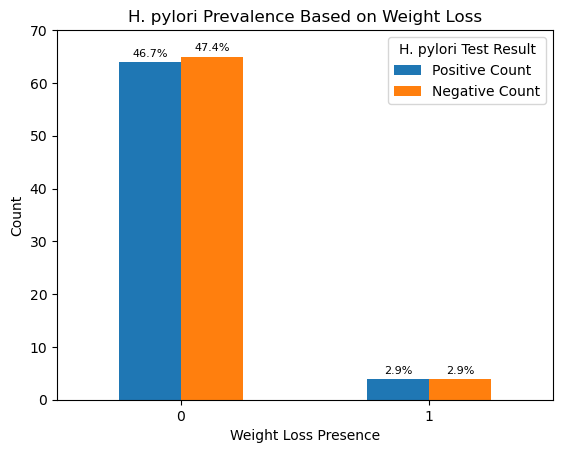

<Figure size 1000x600 with 0 Axes>

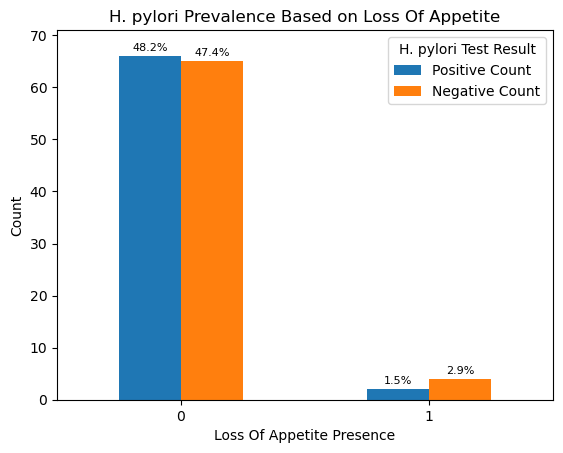

<Figure size 1000x600 with 0 Axes>

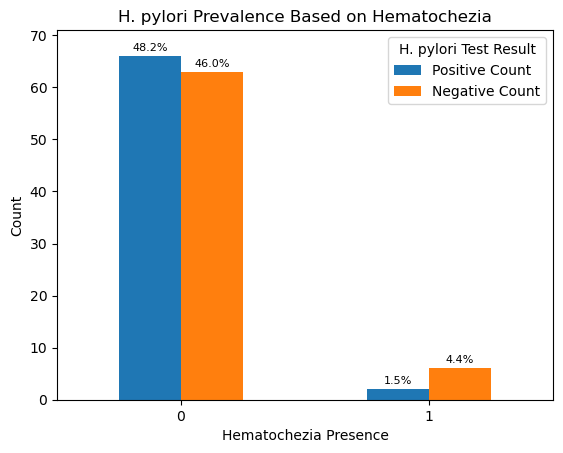

<Figure size 1000x600 with 0 Axes>

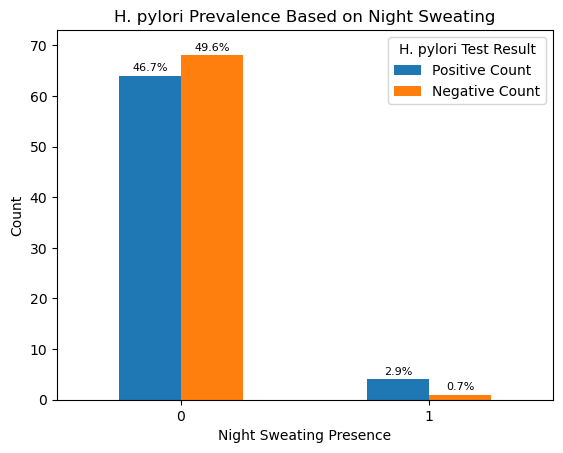

,weight loss,Positive Count,Negative Count,Positive Percentage,Negative Percentage
0,0.0,64,65,49.612403,50.387597
1,1.0,4,4,50.000000,50.000000


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('C:/Users/IDEH/Downloads/Telegram Desktop/dataset/h.pylori.csv')

# Assuming data has been loaded and cleaned in `df`
# Clean up data (if not done already)
df['test result '] = df['test result '].replace({2.0: 1.0})
df = df.drop(columns=['treatment', 'treatment result'])
df = df.iloc[1:, :]
df = df.dropna()

# Convert 'test result' to binary for positive/negative test outcome
df['h_pylori_positive'] = df['test result '].apply(lambda x: 'Positive' if x == 1 else 'Negative')

# List of risk factors to analyze
risk_factors = ['weight loss', 'loss of appetite', 'Hematochezia', 'night sweating']

# Create a dictionary to store prevalence data for each risk factor
risk_summary = {}

for risk in risk_factors:
    # Calculate counts and percentages for each risk factor and test result
    risk_result_counts = df.groupby([risk, 'h_pylori_positive']).size().unstack(fill_value=0)
    risk_result_percentages = risk_result_counts.div(risk_result_counts.sum(axis=1), axis=0) * 100
    
    # Combine counts and percentages into a DataFrame
    risk_summary[risk] = pd.DataFrame({
        'Positive Count': risk_result_counts['Positive'],
        'Negative Count': risk_result_counts['Negative'],
        'Positive Percentage': risk_result_percentages['Positive'],
        'Negative Percentage': risk_result_percentages['Negative'],
    })

# Now let's plot the prevalence for each risk factor
for risk, data in risk_summary.items():
    data.reset_index(inplace=True)
    
    # Plot H. pylori prevalence by risk factor with percentages above the bars
    plt.figure(figsize=(10, 6))
    ax = data[['Positive Count', 'Negative Count']].plot(kind='bar', rot=0)
    plt.title(f'H. pylori Prevalence Based on {risk.title()}')
    plt.xlabel(f'{risk.title()} Presence')
    plt.ylabel('Count')
    plt.legend(title='H. pylori Test Result')
    plt.ylim(0, data[['Positive Count', 'Negative Count']].max().max() + 5)  # Adjust y-axis limit for aesthetics

    # Add percentage labels above each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(x=p.get_x() + p.get_width() / 2, y=height + 1, 
                s='{:.1f}%'.format(height / len(df) * 100), ha='center', fontsize=8)

    plt.show()

# Example: View summary for one risk factor
risk_summary['weight loss']


In [24]:
risk_factors = ['weight loss', 'loss of appetite', 'Hematochezia', 'night sweating']
risk_summary['loss of appetite']


,loss of appetite,Positive Count,Negative Count,Positive Percentage,Negative Percentage
0,0.0,66,65,50.381679,49.618321
1,1.0,2,4,33.333333,66.666667


In [25]:
risk_summary['night sweating']


,night sweating,Positive Count,Negative Count,Positive Percentage,Negative Percentage
0,0.0,64,68,48.484848,51.515152
1,1.0,4,1,80.000000,20.000000


In [26]:
#4

<Figure size 1000x600 with 0 Axes>

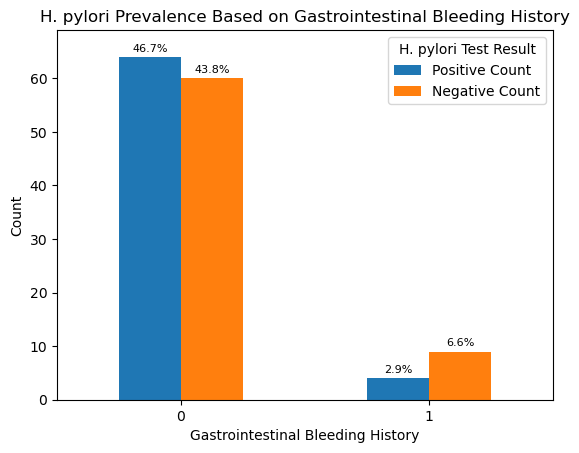

<Figure size 1000x600 with 0 Axes>

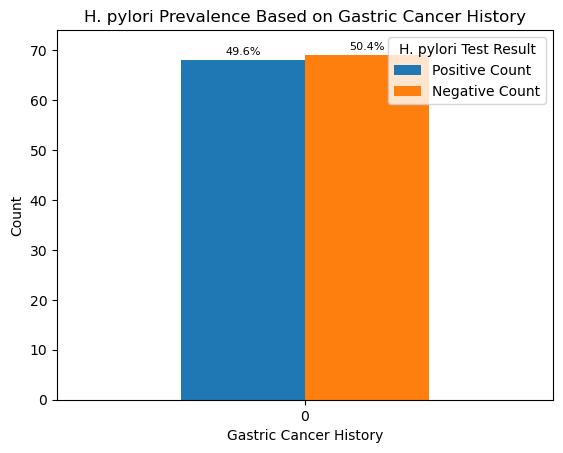

<Figure size 1000x600 with 0 Axes>

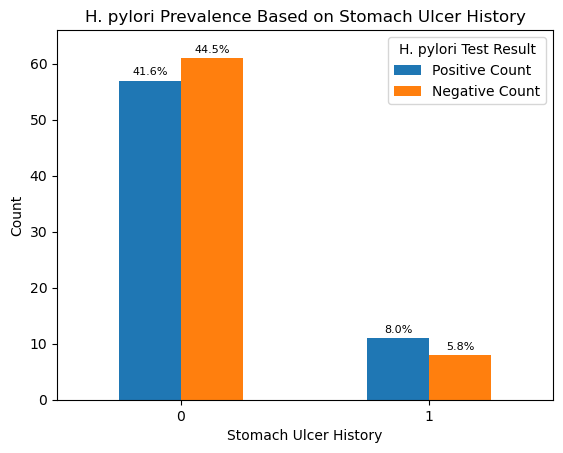

,Gastrointestinal bleeding,Positive Count,Negative Count,Positive Percentage,Negative Percentage
0,0.0,64,60,51.612903,48.387097
1,1.0,4,9,30.769231,69.230769


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:/Users/IDEH/Downloads/Telegram Desktop/dataset/h.pylori.csv')

# Clean up the data (if not done already)
df['test result '] = df['test result '].replace({2.0: 1.0})
df = df.drop(columns=['treatment', 'treatment result'])
df = df.iloc[1:, :]
df = df.dropna()

# Convert 'test result' to binary for positive/negative test outcome
df['h_pylori_positive'] = df['test result '].apply(lambda x: 'Positive' if x == 1 else 'Negative')

# List of underlying disease history features
underlying_diseases = ['Gastrointestinal bleeding', 'gastric cancer', 'stomach ulcer']

# Create a dictionary to store prevalence data for each underlying disease
disease_summary = {}

for disease in underlying_diseases:
    # Calculate counts and percentages for each underlying disease and test result
    disease_result_counts = df.groupby([disease, 'h_pylori_positive']).size().unstack(fill_value=0)
    disease_result_percentages = disease_result_counts.div(disease_result_counts.sum(axis=1), axis=0) * 100
    
    # Combine counts and percentages into a DataFrame
    disease_summary[disease] = pd.DataFrame({
        'Positive Count': disease_result_counts['Positive'],
        'Negative Count': disease_result_counts['Negative'],
        'Positive Percentage': disease_result_percentages['Positive'],
        'Negative Percentage': disease_result_percentages['Negative'],
    })

# Plot the prevalence for each underlying disease and display dataframes
for disease, data in disease_summary.items():
    data.reset_index(inplace=True)
    
    # Plot H. pylori prevalence by underlying disease with percentages above the bars
    plt.figure(figsize=(10, 6))
    ax = data[['Positive Count', 'Negative Count']].plot(kind='bar', rot=0)
    plt.title(f'H. pylori Prevalence Based on {disease.title()} History')
    plt.xlabel(f'{disease.title()} History')
    plt.ylabel('Count')
    plt.legend(title='H. pylori Test Result')
    plt.ylim(0, data[['Positive Count', 'Negative Count']].max().max() + 5)  # Adjust y-axis limit for aesthetics

    # Add percentage labels above each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(x=p.get_x() + p.get_width() / 2, y=height + 1, 
                s='{:.1f}%'.format(height / len(df) * 100), ha='center', fontsize=8)

    plt.show()

# Example: View summary for 'Gastrointestinal bleeding' history
disease_summary['Gastrointestinal bleeding']  # Change to 'gastric cancer' or 'stomach ulcer' as needed


In [28]:
disease_summary['gastric cancer']

,gastric cancer,Positive Count,Negative Count,Positive Percentage,Negative Percentage
0,0.0,68,69,49.635036,50.364964


In [29]:
disease_summary['stomach ulcer']

,stomach ulcer,Positive Count,Negative Count,Positive Percentage,Negative Percentage
0,0.0,57,61,48.305085,51.694915
1,1.0,11,8,57.894737,42.105263


In [30]:
#5

<Figure size 1000x600 with 0 Axes>

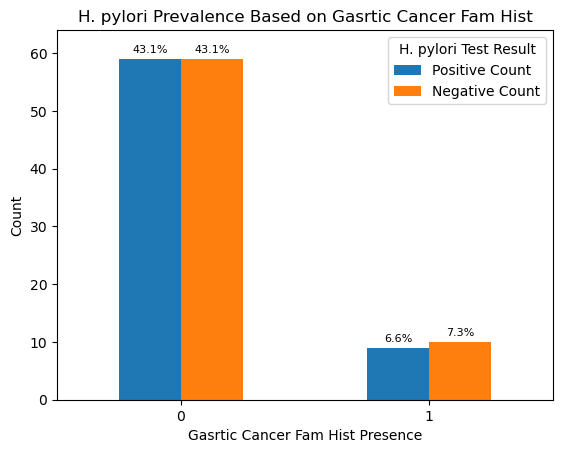

<Figure size 1000x600 with 0 Axes>

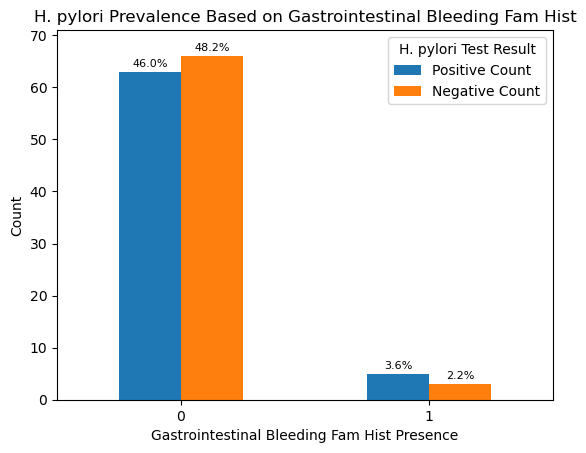

,gasrtic cancer fam hist,Positive Count,Negative Count,Positive Percentage,Negative Percentage
0,0.0,59,59,50.000000,50.000000
1,1.0,9,10,47.368421,52.631579


In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:/Users/IDEH/Downloads/Telegram Desktop/dataset/h.pylori.csv')

# Clean up the data (if not done already)
df['test result '] = df['test result '].replace({2.0: 1.0})
df = df.drop(columns=['treatment', 'treatment result'])
df = df.iloc[1:, :]
df = df.dropna()

# Convert 'test result' to binary for positive/negative test outcome
df['h_pylori_positive'] = df['test result '].apply(lambda x: 'Positive' if x == 1 else 'Negative')

# List of family history features
family_history_features = ['gasrtic cancer fam hist', 'Gastrointestinal bleeding fam hist']

# Create a dictionary to store prevalence data for each family history feature
family_history_summary = {}

for feature in family_history_features:
    # Calculate counts and percentages for each family history feature and test result
    feature_result_counts = df.groupby([feature, 'h_pylori_positive']).size().unstack(fill_value=0)
    feature_result_percentages = feature_result_counts.div(feature_result_counts.sum(axis=1), axis=0) * 100
    
    # Combine counts and percentages into a DataFrame
    family_history_summary[feature] = pd.DataFrame({
        'Positive Count': feature_result_counts['Positive'],
        'Negative Count': feature_result_counts['Negative'],
        'Positive Percentage': feature_result_percentages['Positive'],
        'Negative Percentage': feature_result_percentages['Negative'],
    })

# Plot the prevalence for each family history feature and display dataframes
for feature, data in family_history_summary.items():
    data.reset_index(inplace=True)
    
    # Plot H. pylori prevalence by family history feature with percentages above the bars
    plt.figure(figsize=(10, 6))
    ax = data[['Positive Count', 'Negative Count']].plot(kind='bar', rot=0)
    plt.title(f'H. pylori Prevalence Based on {feature.title()}')
    plt.xlabel(f'{feature.title()} Presence')
    plt.ylabel('Count')
    plt.legend(title='H. pylori Test Result')
    plt.ylim(0, data[['Positive Count', 'Negative Count']].max().max() + 5)  # Adjust y-axis limit for aesthetics

    # Add percentage labels above each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(x=p.get_x() + p.get_width() / 2, y=height + 1, 
                s='{:.1f}%'.format(height / len(df) * 100), ha='center', fontsize=8)

    plt.show()

# Example: View summary for 'gasrtic cancer fam hist' family history
family_history_summary['gasrtic cancer fam hist']  # Change to 'Gastrointestinal bleeding fam hist' for the other feature


In [ ]:
family_history_features = ['gasrtic cancer fam hist', 'Gastrointestinal bleeding fam hist']


In [32]:
family_history_summary['Gastrointestinal bleeding fam hist']

,Gastrointestinal bleeding fam hist,Positive Count,Negative Count,Positive Percentage,Negative Percentage
0,0.0,63,66,48.837209,51.162791
1,1.0,5,3,62.500000,37.500000


In [ ]:
#6

<Figure size 1000x600 with 0 Axes>

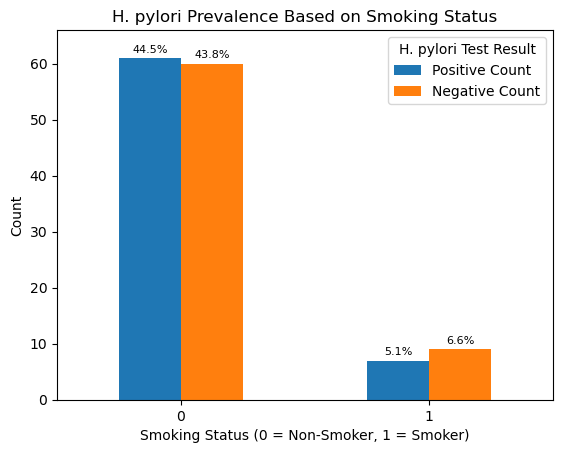

,smoker,Positive Count,Negative Count,Positive Percentage,Negative Percentage
0,0.0,61,60,50.413223,49.586777
1,1.0,7,9,43.750000,56.250000


In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:/Users/IDEH/Downloads/Telegram Desktop/dataset/h.pylori.csv')

# Clean up the data (if not done already)
df['test result '] = df['test result '].replace({2.0: 1.0})
df = df.drop(columns=['treatment', 'treatment result'])
df = df.iloc[1:, :]
df = df.dropna()

# Convert 'test result' to binary for positive/negative test outcome
df['h_pylori_positive'] = df['test result '].apply(lambda x: 'Positive' if x == 1 else 'Negative')

# Analyze the smoking feature
smoking_result_counts = df.groupby(['smoker', 'h_pylori_positive']).size().unstack(fill_value=0)
smoking_result_percentages = smoking_result_counts.div(smoking_result_counts.sum(axis=1), axis=0) * 100

# Combine counts and percentages into a DataFrame
smoking_summary = pd.DataFrame({
    'Positive Count': smoking_result_counts['Positive'],
    'Negative Count': smoking_result_counts['Negative'],
    'Positive Percentage': smoking_result_percentages['Positive'],
    'Negative Percentage': smoking_result_percentages['Negative'],
})

# Reset index for better visualization
smoking_summary.reset_index(inplace=True)

# Plot H. pylori prevalence by smoking status with percentages above the bars
plt.figure(figsize=(10, 6))
ax = smoking_summary[['Positive Count', 'Negative Count']].plot(kind='bar', rot=0)
plt.title('H. pylori Prevalence Based on Smoking Status')
plt.xlabel('Smoking Status (0 = Non-Smoker, 1 = Smoker)')
plt.ylabel('Count')
plt.legend(title='H. pylori Test Result')
plt.ylim(0, smoking_summary[['Positive Count', 'Negative Count']].max().max() + 5)  # Adjust y-axis limit for aesthetics

# Add percentage labels above each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height + 1, 
            s='{:.1f}%'.format(height / len(df) * 100), ha='center', fontsize=8)

plt.show()

# Display the summary DataFrame for smoking status
smoking_summary


In [34]:
#7

<Figure size 1000x600 with 0 Axes>

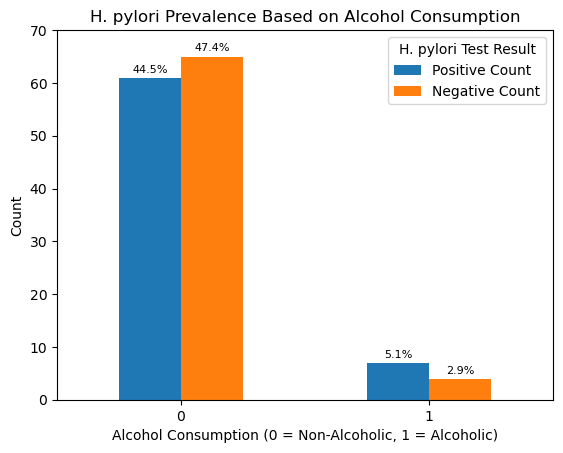

,alchohlic,Positive Count,Negative Count,Positive Percentage,Negative Percentage
0,0.0,61,65,48.412698,51.587302
1,1.0,7,4,63.636364,36.363636


In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:/Users/IDEH/Downloads/Telegram Desktop/dataset/h.pylori.csv')

# Clean up the data (if not done already)
df['test result '] = df['test result '].replace({2.0: 1.0})
df = df.drop(columns=['treatment', 'treatment result'])
df = df.iloc[1:, :]
df = df.dropna()

# Convert 'test result' to binary for positive/negative test outcome
df['h_pylori_positive'] = df['test result '].apply(lambda x: 'Positive' if x == 1 else 'Negative')

# Analyze the alcohol consumption feature
alcohol_result_counts = df.groupby(['alchohlic', 'h_pylori_positive']).size().unstack(fill_value=0)
alcohol_result_percentages = alcohol_result_counts.div(alcohol_result_counts.sum(axis=1), axis=0) * 100

# Combine counts and percentages into a DataFrame
alcohol_summary = pd.DataFrame({
    'Positive Count': alcohol_result_counts['Positive'],
    'Negative Count': alcohol_result_counts['Negative'],
    'Positive Percentage': alcohol_result_percentages['Positive'],
    'Negative Percentage': alcohol_result_percentages['Negative'],
})

# Reset index for better visualization
alcohol_summary.reset_index(inplace=True)

# Plot H. pylori prevalence by alcohol consumption status with percentages above the bars
plt.figure(figsize=(10, 6))
ax = alcohol_summary[['Positive Count', 'Negative Count']].plot(kind='bar', rot=0)
plt.title('H. pylori Prevalence Based on Alcohol Consumption')
plt.xlabel('Alcohol Consumption (0 = Non-Alcoholic, 1 = Alcoholic)')
plt.ylabel('Count')
plt.legend(title='H. pylori Test Result')
plt.ylim(0, alcohol_summary[['Positive Count', 'Negative Count']].max().max() + 5)  # Adjust y-axis limit for aesthetics

# Add percentage labels above each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height + 1, 
            s='{:.1f}%'.format(height / len(df) * 100), ha='center', fontsize=8)

plt.show()

# Display the summary DataFrame for alcohol consumption
alcohol_summary


In [37]:
#8

In [54]:
df = pd.read_csv('C:/Users/IDEH/Downloads/Telegram Desktop/dataset/h.pylori.csv')
df.columns

Index(['case no', 'age', 'sex', 'education', 'job', 'epigastric pain',
       'fullness', ' bloating', 'reflux', 'halitosis', ' nausea', 'vomit',
       ' diarrhea', ' constipation', 'months', 'Hematochezia',
       'loss of appetite', 'weight loss', 'night sweating',
       'Treatment of previous infection and use of antibiotics', ' ppi taking',
       ' nsaid taking', 'alchohlic', 'smoker', 'Gastrointestinal bleeding',
       'gastric cancer', 'peptic ulcer', 'Gastrointestinal bleeding fam hist',
       'gasrtic cancer fam hist', 'stomach ulcer', 'Revisit',
       'treatment result', 'test result ', 'treatment'],
      dtype='object')

<Figure size 1000x600 with 0 Axes>

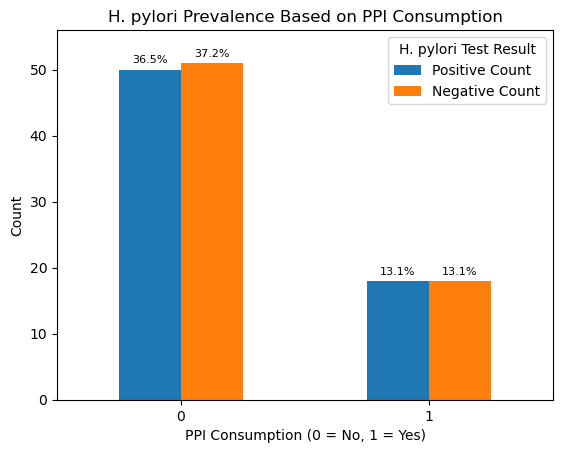

,ppi taking,Positive Count,Negative Count,Positive Percentage,Negative Percentage
0,0.0,50,51,49.50495,50.49505
1,1.0,18,18,50.00000,50.00000


In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:/Users/IDEH/Downloads/Telegram Desktop/dataset/h.pylori.csv')

# Clean up the data (if not done already)
df['test result '] = df['test result '].replace({2.0: 1.0})
df = df.drop(columns=['treatment', 'treatment result'])
df = df.iloc[1:, :]
df = df.dropna()

# Convert 'test result' to binary for positive/negative test outcome
df['h_pylori_positive'] = df['test result '].apply(lambda x: 'Positive' if x == 1 else 'Negative')

# Analyze the PPI consumption feature
ppi_result_counts = df.groupby([' ppi taking', 'h_pylori_positive']).size().unstack(fill_value=0)
ppi_result_percentages = ppi_result_counts.div(ppi_result_counts.sum(axis=1), axis=0) * 100

# Combine counts and percentages into a DataFrame
ppi_summary = pd.DataFrame({
    'Positive Count': ppi_result_counts['Positive'],
    'Negative Count': ppi_result_counts['Negative'],
    'Positive Percentage': ppi_result_percentages['Positive'],
    'Negative Percentage': ppi_result_percentages['Negative'],
})

# Reset index for better visualization
ppi_summary.reset_index(inplace=True)

# Plot H. pylori prevalence by PPI consumption status with percentages above the bars
plt.figure(figsize=(10, 6))
ax = ppi_summary[['Positive Count', 'Negative Count']].plot(kind='bar', rot=0)
plt.title('H. pylori Prevalence Based on PPI Consumption')
plt.xlabel('PPI Consumption (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='H. pylori Test Result')
plt.ylim(0, ppi_summary[['Positive Count', 'Negative Count']].max().max() + 5)  # Adjust y-axis limit for aesthetics

# Add percentage labels above each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height + 1, 
            s='{:.1f}%'.format(height / len(df) * 100), ha='center', fontsize=8)

plt.show()

# Display the summary DataFrame for PPI consumption
ppi_summary


In [56]:
#9

<Figure size 1000x600 with 0 Axes>

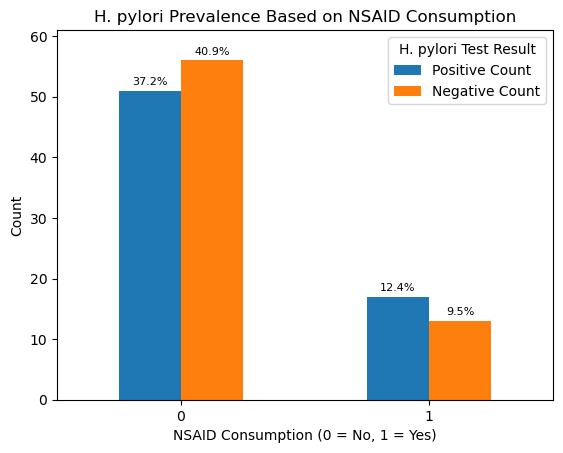

,nsaid taking,Positive Count,Negative Count,Positive Percentage,Negative Percentage
0,0.0,51,56,47.663551,52.336449
1,1.0,17,13,56.666667,43.333333


In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:/Users/IDEH/Downloads/Telegram Desktop/dataset/h.pylori.csv')

# Clean up the data (if not done already)
df['test result '] = df['test result '].replace({2.0: 1.0})
df = df.drop(columns=['treatment', 'treatment result'])
df = df.iloc[1:, :]
df = df.dropna()

# Convert 'test result' to binary for positive/negative test outcome
df['h_pylori_positive'] = df['test result '].apply(lambda x: 'Positive' if x == 1 else 'Negative')

# Analyze the NSAID consumption feature
nsaid_result_counts = df.groupby([' nsaid taking', 'h_pylori_positive']).size().unstack(fill_value=0)
nsaid_result_percentages = nsaid_result_counts.div(nsaid_result_counts.sum(axis=1), axis=0) * 100

# Combine counts and percentages into a DataFrame
nsaid_summary = pd.DataFrame({
    'Positive Count': nsaid_result_counts['Positive'],
    'Negative Count': nsaid_result_counts['Negative'],
    'Positive Percentage': nsaid_result_percentages['Positive'],
    'Negative Percentage': nsaid_result_percentages['Negative'],
})

# Reset index for better visualization
nsaid_summary.reset_index(inplace=True)

# Plot H. pylori prevalence by NSAID consumption status with percentages above the bars
plt.figure(figsize=(10, 6))
ax = nsaid_summary[['Positive Count', 'Negative Count']].plot(kind='bar', rot=0)
plt.title('H. pylori Prevalence Based on NSAID Consumption')
plt.xlabel('NSAID Consumption (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='H. pylori Test Result')
plt.ylim(0, nsaid_summary[['Positive Count', 'Negative Count']].max().max() + 5)  # Adjust y-axis limit for aesthetics

# Add percentage labels above each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height + 1, 
            s='{:.1f}%'.format(height / len(df) * 100), ha='center', fontsize=8)

plt.show()

# Display the summary DataFrame for NSAID consumption
nsaid_summary


In [59]:
#10

<Figure size 1000x600 with 0 Axes>

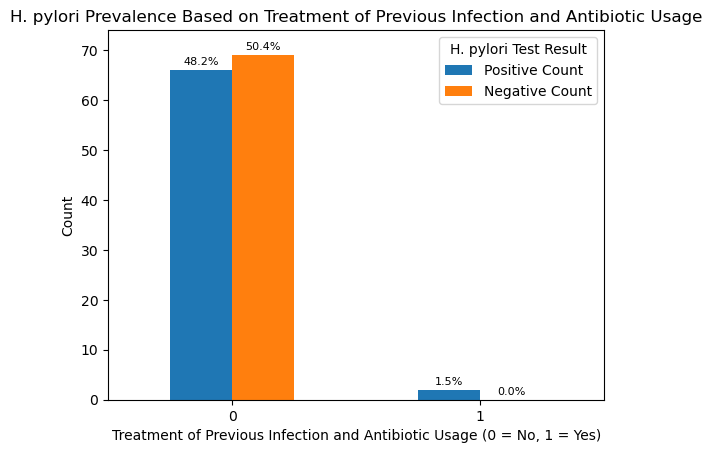

,Treatment of previous infection and use of antibiotics,Positive Count,Negative Count,Positive Percentage,Negative Percentage
0,0.0,66,69,48.888889,51.111111
1,1.0,2,0,100.000000,0.000000


In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:/Users/IDEH/Downloads/Telegram Desktop/dataset/h.pylori.csv')

# Clean up the data (if not done already)
df['test result '] = df['test result '].replace({2.0: 1.0})
df = df.drop(columns=['treatment', 'treatment result'])
df = df.iloc[1:, :]
df = df.dropna()

# Convert 'test result' to binary for positive/negative test outcome
df['h_pylori_positive'] = df['test result '].apply(lambda x: 'Positive' if x == 1 else 'Negative')

# Analyze the previous infection treatment and antibiotic usage feature
treatment_antibiotic_result_counts = df.groupby(['Treatment of previous infection and use of antibiotics', 'h_pylori_positive']).size().unstack(fill_value=0)
treatment_antibiotic_result_percentages = treatment_antibiotic_result_counts.div(treatment_antibiotic_result_counts.sum(axis=1), axis=0) * 100

# Combine counts and percentages into a DataFrame
treatment_antibiotic_summary = pd.DataFrame({
    'Positive Count': treatment_antibiotic_result_counts['Positive'],
    'Negative Count': treatment_antibiotic_result_counts['Negative'],
    'Positive Percentage': treatment_antibiotic_result_percentages['Positive'],
    'Negative Percentage': treatment_antibiotic_result_percentages['Negative'],
})

# Reset index for better visualization
treatment_antibiotic_summary.reset_index(inplace=True)

# Plot H. pylori prevalence based on previous infection treatment and antibiotic usage with percentages above the bars
plt.figure(figsize=(10, 6))
ax = treatment_antibiotic_summary[['Positive Count', 'Negative Count']].plot(kind='bar', rot=0)
plt.title('H. pylori Prevalence Based on Treatment of Previous Infection and Antibiotic Usage')
plt.xlabel('Treatment of Previous Infection and Antibiotic Usage (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='H. pylori Test Result')
plt.ylim(0, treatment_antibiotic_summary[['Positive Count', 'Negative Count']].max().max() + 5)  # Adjust y-axis limit for aesthetics

# Add percentage labels above each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height + 1, 
            s='{:.1f}%'.format(height / len(df) * 100), ha='center', fontsize=8)

plt.show()

# Display the summary DataFrame for previous infection treatment and antibiotic usage
treatment_antibiotic_summary


In [ ]:
#11

<Figure size 1000x600 with 0 Axes>

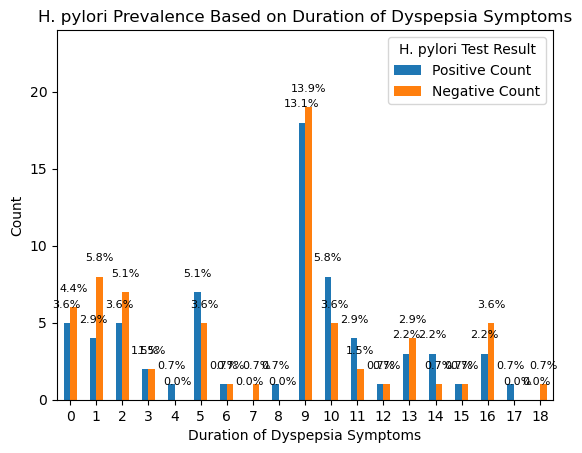

,months,Positive Count,Negative Count,Positive Percentage,Negative Percentage
0,1.0,5,6,45.454545,54.545455
1,2.0,4,8,33.333333,66.666667
2,3.0,5,7,41.666667,58.333333
3,4.0,2,2,50.000000,50.000000
4,5.0,1,0,100.000000,0.000000
5,6.0,7,5,58.333333,41.666667
6,7.0,1,1,50.000000,50.000000
7,8.0,0,1,0.000000,100.000000
8,9.0,1,0,100.000000,0.000000
9,12.0,18,19,48.648649,51.351351


In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:/Users/IDEH/Downloads/Telegram Desktop/dataset/h.pylori.csv')

# Clean up the data (if not done already)
df['test result '] = df['test result '].replace({2.0: 1.0})
df = df.drop(columns=['treatment', 'treatment result'])
df = df.iloc[1:, :]
df = df.dropna()

# Convert 'test result' to binary for positive/negative test outcome
df['h_pylori_positive'] = df['test result '].apply(lambda x: 'Positive' if x == 1 else 'Negative')

# Analyze the H. pylori prevalence based on the duration of dyspepsia symptoms
# Assuming there's a column in the dataset for 'duration of dyspepsia symptoms'
duration_symptoms_result_counts = df.groupby(['months', 'h_pylori_positive']).size().unstack(fill_value=0)
duration_symptoms_result_percentages = duration_symptoms_result_counts.div(duration_symptoms_result_counts.sum(axis=1), axis=0) * 100

# Combine counts and percentages into a DataFrame
duration_symptoms_summary = pd.DataFrame({
    'Positive Count': duration_symptoms_result_counts['Positive'],
    'Negative Count': duration_symptoms_result_counts['Negative'],
    'Positive Percentage': duration_symptoms_result_percentages['Positive'],
    'Negative Percentage': duration_symptoms_result_percentages['Negative'],
})

# Reset index for better visualization
duration_symptoms_summary.reset_index(inplace=True)

# Plot H. pylori prevalence based on the duration of dyspepsia symptoms
plt.figure(figsize=(10, 6))
ax = duration_symptoms_summary[['Positive Count', 'Negative Count']].plot(kind='bar', rot=0)
plt.title('H. pylori Prevalence Based on Duration of Dyspepsia Symptoms')
plt.xlabel('Duration of Dyspepsia Symptoms')
plt.ylabel('Count')
plt.legend(title='H. pylori Test Result')
plt.ylim(0, duration_symptoms_summary[['Positive Count', 'Negative Count']].max().max() + 5)  # Adjust y-axis limit for aesthetics

# Add percentage labels above each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height + 1, 
            s='{:.1f}%'.format(height / len(df) * 100), ha='center', fontsize=8)

plt.show()

# Display the summary DataFrame for the duration of dyspepsia symptoms
duration_symptoms_summary
